In this notebook, we would analyze the olivetti faces (dataset available publicly, lately incorporated in sklearn). We would randomly split the dataset into train and test, create Eigen faces and mean face from training data and we would then try to regenerate the train and test faces using mean and Eigen faces.

In [1]:
# Import library / packages

# For numerical operation
import numpy as np

# For plots
from matplotlib import pyplot as plt

# Train-test split
from sklearn.model_selection import train_test_split

# For PCA
from sklearn.decomposition import PCA


In [2]:
# Load the faces
faces_image = np.load('Faces\\olivetti_faces.npy')
faces_target = np.load('Faces\\olivetti_faces_target.npy')

# Find the dimension
faces_image.shape, faces_target.shape

((400, 64, 64), (400,))

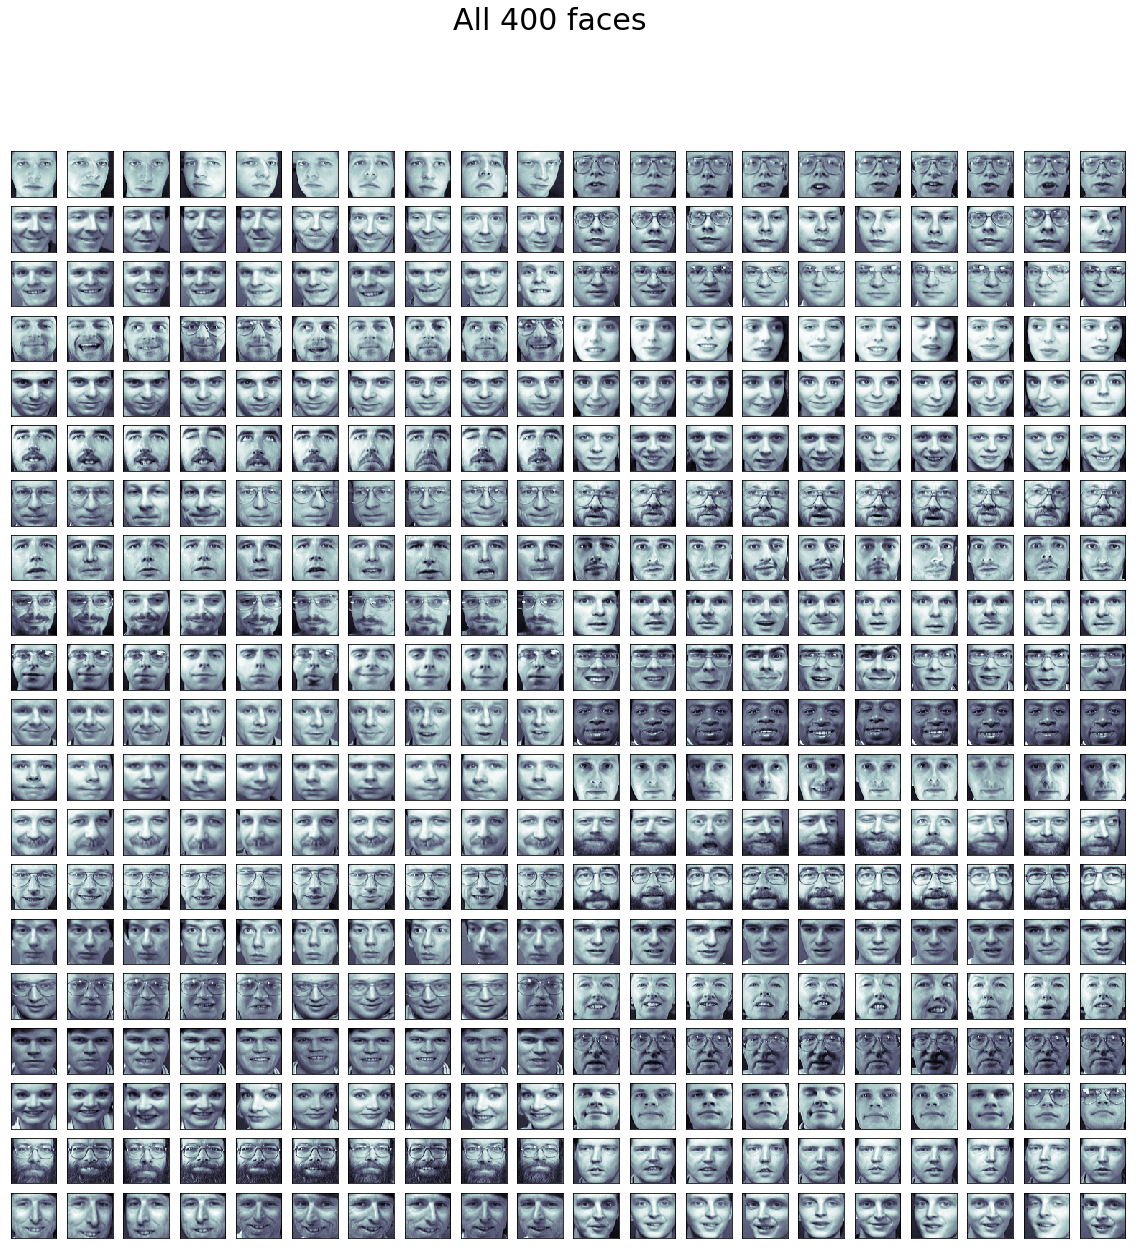

In [3]:
# View all the 400 faces
fig, axes = plt.subplots(20,20,figsize=(20,20),\
                        subplot_kw = {'xticks':[],'yticks':[]})

plt.suptitle('All 400 faces', fontsize = 30)

for i, ax in enumerate(axes.flat) :
    ax.imshow(faces_image[i,:,:].reshape(64,64), cmap = 'bone')

In [4]:
# Split the train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(faces_image.reshape(400,-1), faces_target.reshape(400,1),\
                                                    stratify = faces_target, test_size = 0.30)

## Principal component Analysis (PCA) on training data

In [5]:
# Find all Principal Components
max_features = 200
pca = PCA(n_components=max_features)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Eigen face from training data

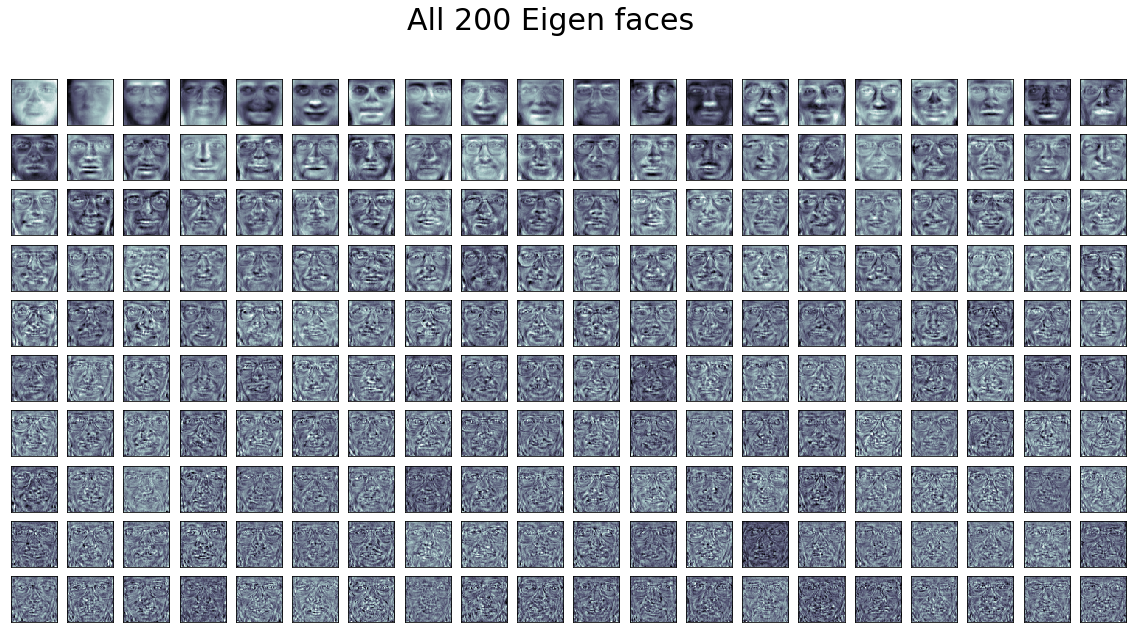

In [6]:
# View all the 200 Eigen faces
fig, axes = plt.subplots(10,20,figsize=(20,10),\
                        subplot_kw = {'xticks':[],'yticks':[]})

plt.suptitle('All 200 Eigen faces', fontsize = 30)

for i, ax in enumerate(axes.flat) :
    ax.imshow(pca.components_[i,:].reshape(64,64), cmap = 'bone')

In [10]:
# Extract other informations
Eigen_val = pca.explained_variance_
Eigen_vec = pca.components_
Weight_train = pca.transform(X_train)
Weight_test = pca.transform(X_test)
Mean_face = pca.mean_

# Regenerated faces using Eigen faces

In [37]:
# Regenerate some random faces
def show_regenerated_faces(X, Weights,cat) :
    
    fig, axes = plt.subplots(20,20,figsize=(22,22),\
                            subplot_kw = {'xticks':[],'yticks':[]})

    plt.suptitle('Original, Mean and regenerated face using Eigen faces - ' + cat, fontsize = 30)

    random_faces = np.random.choice(Weights.shape[0],20)

    for i, ax in enumerate(axes.flat) :
        j = random_faces[int(i / 20)]
        if (i % 20 ) == 0 :
            ax.imshow(X[j,:].reshape(64,64), cmap = 'bone')
            if int(i / 20) == 19 :
                ax.set_xlabel('Original')
            elif int(i / 20) == 0 :
                ax.set_title('Original')
        elif (i % 20 ) == 1 :
            ax.imshow(Mean_face.reshape(64,64), cmap = 'bone')
            if int(i / 20) == 19 :
                ax.set_xlabel('Mean')
            elif int(i / 20) == 0 :
                ax.set_title('Mean')
        elif (i % 20 ) > 1 :
            k = 5*((i % 20)-1)
            face = Mean_face.reshape(1,-1) + np.dot(Weights[j,0:k],Eigen_vec[0:k,:])
            ax.imshow(face.reshape(64,64), cmap = 'bone')
            if int(i / 20) == 19 :
                ax.set_xlabel(str(k)+' Eigens')
            elif int(i / 20) == 0 : 
                ax.set_title(str(k)+' Eigens')
        
    

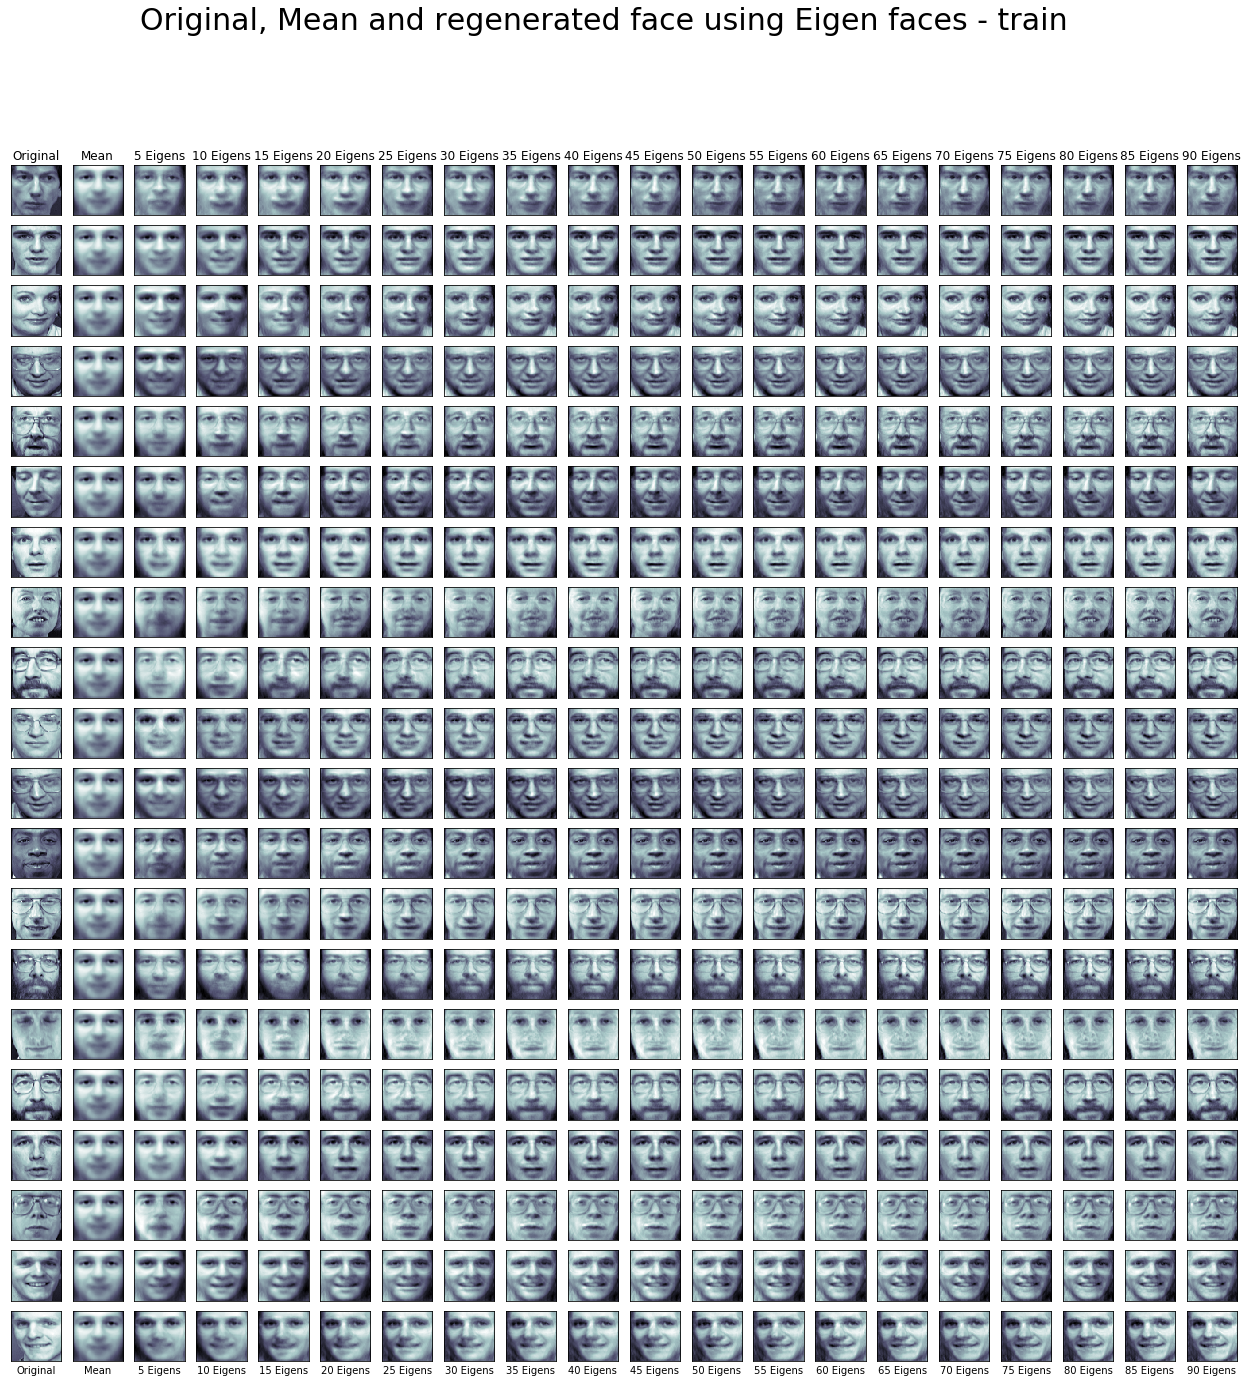

In [38]:
# Regenerated train faces
show_regenerated_faces(X_train, Weight_train, 'train')

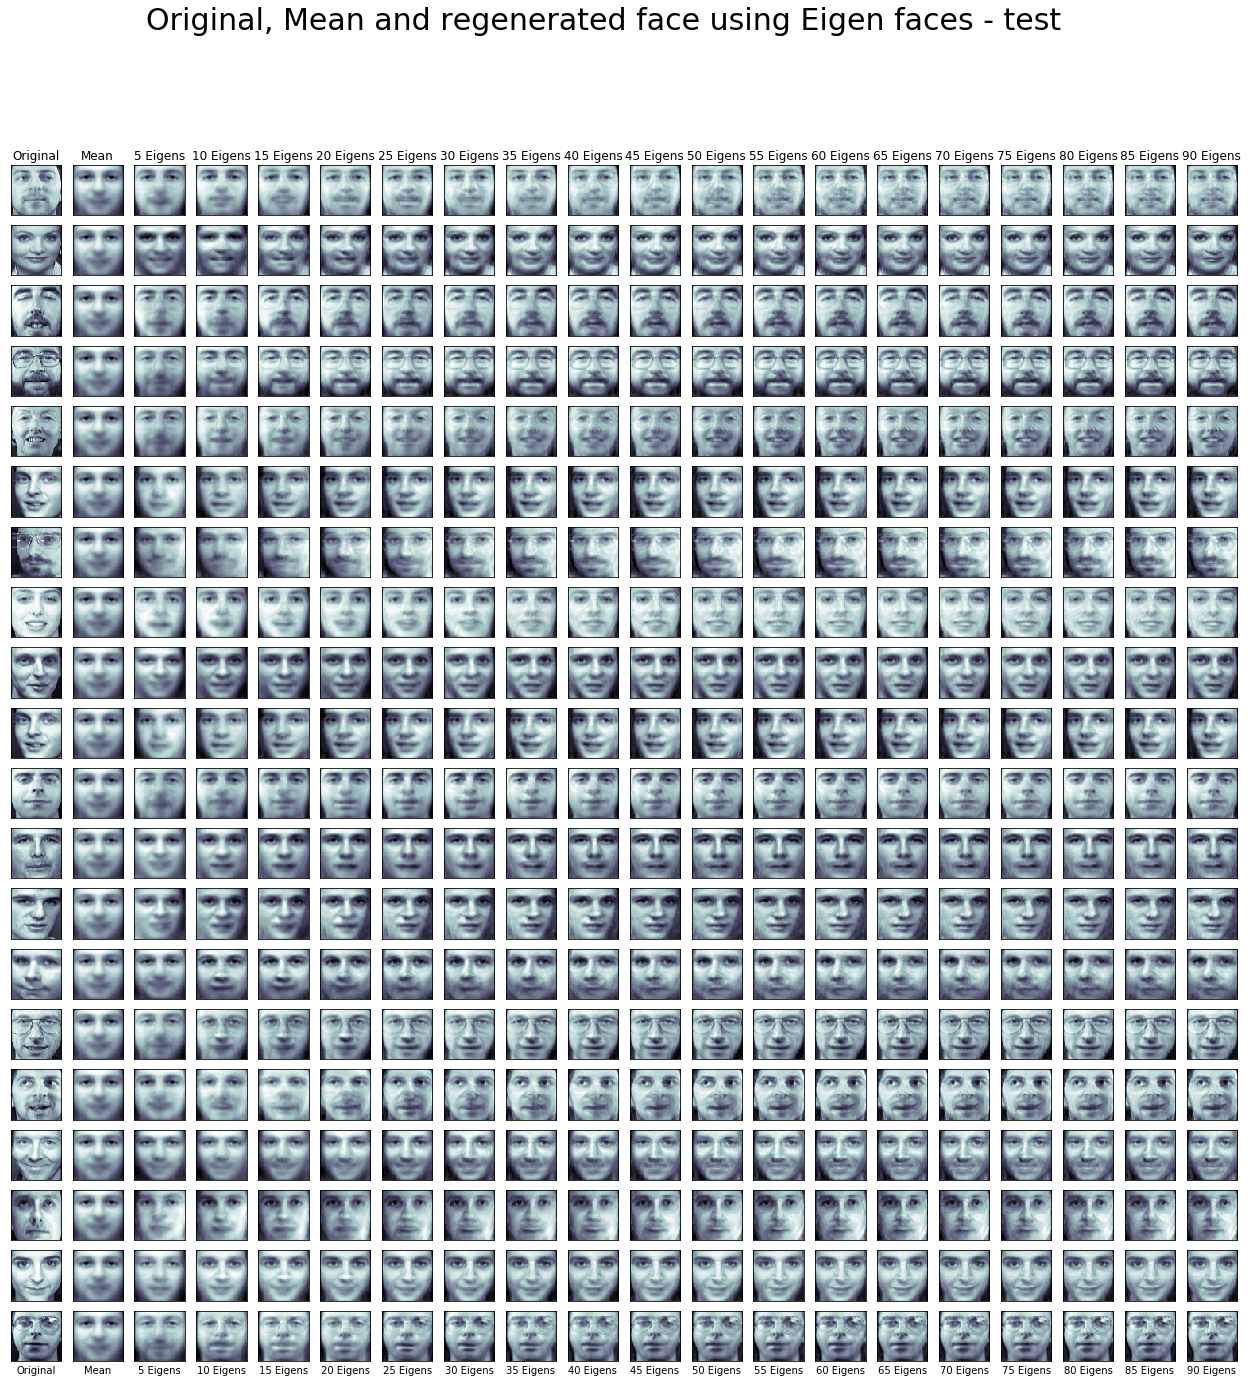

In [39]:
# Regenerated test faces
show_regenerated_faces(X_test, Weight_test, 'test')

As you would see from train and test dataset - Approx 50 (as few as) Eigen faces/weights (out of 4096) helps us regenerate a face quite close to original face. This is tremendous reduction in size due to PCA !!

## Save the data

In [36]:
# Let's save the data
np.save("Result01\X_train.npy", X_train)
np.save("Result01\X_test.npy", X_test)
np.save("Result01\Y_train.npy", Y_train)
np.save("Result01\Y_test.npy", Y_test)
np.save("Result01\Weight_train.npy", Weight_train)
np.save("Result01\Weight_test.npy", Weight_test)
np.save("Result01\Eigen_val.npy", Eigen_val)
np.save("Result01\Eigen_vec.npy", Eigen_vec)
np.save("Result01\Mean_face.npy", Mean_face)
